In [1]:
from galileojp.k3s import K3SGateway
from dotenv import load_dotenv
import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

load_dotenv()

True

In [2]:
%env

{'PATH': '/home/silv/projects/silv-io/mulambda-experiments/.venv/bin:/home/silv/.pyenv/shims:/home/silv/.pyenv/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl:/usr/lib/rustup/bin:/home/silv/.local/share/JetBrains/Toolbox/scripts',
 'INVOCATION_ID': 'eca3302b34764d2ca15cd64a185d485b',
 'XAUTHORITY': '/run/user/1000/.mutter-Xwaylandauth.WXQJC2',
 'MEMORY_PRESSURE_WRITE': 'c29tZSAyMDAwMDAgMjAwMDAwMAA=',
 'GDMSESSION': 'gnome',
 'XDG_DATA_DIRS': '/home/silv/.local/share/flatpak/exports/share:/var/lib/flatpak/exports/share:/usr/local/share/:/usr/share/',
 'MEMORY_PRESSURE_WATCH': '/sys/fs/cgroup/user.slice/user-1000.slice/user@1000.service/session.slice/org.gnome.Shell@wayland.service/memory.pressure',
 'MOTD_SHOWN': 'pam',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
 'LANG': 'en_US.UTF-8',
 'XDG_SESSION_TYPE': 'wayland',
 'XDG_ACTIVATION_TOKEN': '<hidden>',
 'PS1': '(.venv) ',
 'XDG_CURRENT_DES

In [3]:
gw = K3SGateway.from_env()

In [7]:
gw.experiments().sort_values(by='CREATED', ascending=False).head(100)

/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,EXP_ID,NAME,CREATOR,START,END,CREATED,STATUS,metadata
84,202310162132-b4cc,exp-scale-test-round-robin-client-psa-100-10-50,silvio,1.697485e+09,1.697485e+09,1.697485e+09,FINISHED,"{""exp_id"": ""202310162132-b4cc"", ""target"": ""rou..."
83,202310162127-da39,exp-scale-test-random-client-psa-100-10-50,silvio,1.697484e+09,1.697485e+09,1.697484e+09,FINISHED,"{""exp_id"": ""202310162127-da39"", ""target"": ""ran..."
82,202310162114-8a57,exp-scale-test-plain-net-latency-client-psa-10...,silvio,1.697484e+09,1.697484e+09,1.697484e+09,FINISHED,"{""exp_id"": ""202310162114-8a57"", ""target"": ""pla..."
81,202310162022-b0d6,exp-scale-test-mulambda-client-psa-100-10-50,silvio,1.697481e+09,1.697484e+09,1.697481e+09,FINISHED,"{""exp_id"": ""202310162022-b0d6"", ""target"": ""mul..."
80,202310162020-c21b,exp-scale-test-round-robin-client-psa-100-10-10,silvio,1.697480e+09,1.697481e+09,1.697480e+09,FINISHED,"{""exp_id"": ""202310162020-c21b"", ""target"": ""rou..."
...,...,...,...,...,...,...,...,...
4,202309281131-aade,exp-log-mult-rem-mulambda-client-env-100-10-5,silvio,1.695893e+09,1.695894e+09,1.695893e+09,FINISHED,"{""exp_id"": ""202309281131-aade"", ""target"": ""mul..."
3,202309220052-dbda,exp-logical-mult-22d9-round-robin-client-scp-1...,silvio,1.695337e+09,1.695338e+09,1.695337e+09,FINISHED,"{""exp_id"": ""202309220052-dbda"", ""target"": ""rou..."
2,202309220034-9f79,exp-logical-mult-22d9-random-client-scp-1000-10-5,silvio,1.695336e+09,1.695337e+09,1.695336e+09,FINISHED,"{""exp_id"": ""202309220034-9f79"", ""target"": ""ran..."
1,202309220013-ee99,exp-logical-mult-22d9-plain-net-latency-client...,silvio,1.695334e+09,1.695336e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220013-ee99"", ""target"": ""pla..."


In [6]:
exp_id = '202310050959-ce94'
gw.delete('202310162136-4239')


In [29]:

exps = gw.experiments()
exp = exps[exps["EXP_ID"] == exp_id].iloc[0]
exp["END"] - exp["START"]

/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


6.821851968765259

In [30]:
tm = gw.telemetry(exp_id)
print(tm.index.min(), tm.index.max())


2023-09-28 06:05:04.576536894 2023-09-28 08:51:44.837866783


In [21]:
tm.columns

Index(['value', 'exp_id', 'metric', 'node', 'ts', 'subsystem'], dtype='object')

,value,exp_id,metric,node,ts,subsystem
ts,,,,,,
2023-09-21 22:06:39.748822451,9.705873e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695333999.7488225,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:42.750317335,9.706802e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334002.7503173,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:45.744759321,9.707264e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334005.7447593,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:48.736260414,9.707998e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334008.7362604,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:51.737968445,9.708778e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334011.7379684,0af0c76479f170d15689d04ca0241bfb
...,...,...,...,...,...,...
2023-09-21 18:52:11.525616883,3.946282e+11,202309220006-9452,kubernetes_cgrp_cpu,s30-worker-zone-c-3,1695322331.525617,f0f76360a719d5b0ab8fe0ffbe8f4223
2023-09-21 18:52:14.526512384,3.947439e+11,202309220006-9452,kubernetes_cgrp_cpu,s30-worker-zone-c-3,1695322334.5265124,f0f76360a719d5b0ab8fe0ffbe8f4223
2023-09-21 18:52:17.529692173,3.948731e+11,202309220006-9452,kubernetes_cgrp_cpu,s30-worker-zone-c-3,1695322337.5296922,f0f76360a719d5b0ab8fe0ffbe8f4223


In [35]:
ev = gw.events(exp_id)
ev.head(10)

,value,exp_id,name,ts
ts,,,,
2023-10-05 07:59:12.695779562,"{""type"": ""start""}",202310050959-ce94,mulambda,1696492752.6957796
2023-10-05 07:59:15.594830513,"{""type"": ""end""}",202310050959-ce94,mulambda,1696492755.5948305
2023-10-05 07:59:15.912286758,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492755.9122868
2023-10-05 07:59:16.612300873,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492756.6123009
2023-10-05 07:59:17.235194206,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492757.2351942
2023-10-05 07:59:17.306486368,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492757.3064864
2023-10-05 07:59:17.542870283,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492757.5428703
2023-10-05 07:59:17.892580032,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492757.89258
2023-10-05 07:59:18.012029648,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202310050959-ce94,mulambda,1696492758.0120296


In [36]:
import json
from util import json_transform
import pandas as pd

new = ev.copy()
new['value'] = new['value'].apply(json.loads)
transformed = json_transform(new, "value")
transformed = json_transform(transformed, "model_traits", "model_")
transformed["time"] = (transformed.index - transformed.index[0]).total_seconds()
transformed

,exp_id,name,ts,type,client_id,data,endpoint,elapsed,model,latency,...,model_id,model_type,model_input,model_output,model_mdd,model_latencies,model_accuracy,model_path,model_port,time
ts,,,,,,,,,,,,,,,,,,,,,
2023-10-05 07:59:12.695779562,202310050959-ce94,mulambda,1696492752.6957796,start,None,None,None,NaN,None,NaN,...,None,None,None,None,NaN,None,NaN,None,NaN,0.000000
2023-10-05 07:59:15.594830513,202310050959-ce94,mulambda,1696492755.5948305,end,None,None,None,NaN,None,NaN,...,None,None,None,None,NaN,None,NaN,None,NaN,2.899051
2023-10-05 07:59:15.912286758,202310050959-ce94,mulambda,1696492755.9122868,request,mulambda-client,"{'inputs': [9.48, 77.59, 85.72, 36.61, 11.44, ...",http://arbitrary-20231005095418-2-18c86f8d.mul...,0.237,None,NaN,...,arbitrary-20231005095418-2-18c86f8d,dummy,dummy,dummy,0.0,"{'plain-net-latency-client': 92, 'mulambda-cli...",0.647301,/,80.0,3.216507
2023-10-05 07:59:16.612300873,202310050959-ce94,mulambda,1696492756.6123009,request,mulambda-client,"{'inputs': [4.34, 99.79, 12.44, 11.87, 33.49, ...",http://arbitrary-20231005095418-2-18c86f8d.mul...,0.924,None,NaN,...,arbitrary-20231005095418-2-18c86f8d,dummy,dummy,dummy,0.0,"{'plain-net-latency-client': 92, 'mulambda-cli...",0.359612,/,80.0,3.916521
2023-10-05 07:59:17.235194206,202310050959-ce94,mulambda,1696492757.2351942,request,mulambda-client,"{'inputs': [80.72, 16.85, 44.04, 46.08, 90.06,...",http://arbitrary-20231005095418-8-dfd44731.mul...,1.199,None,NaN,...,arbitrary-20231005095418-8-dfd44731,dummy,dummy,dummy,0.0,"{'plain-net-latency-client': 90, 'mulambda-cli...",0.372041,/,80.0,4.539415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 08:01:54.036916733,202310050959-ce94,mulambda_companion,1696492914.0369167,companion,round-robin-client,None,None,NaN,arbitrary-20231005095418-2-01d3f168,1829.0,...,None,None,None,None,NaN,None,NaN,None,NaN,161.341137
2023-10-05 08:01:54.226637125,202310050959-ce94,mulambda_companion,1696492914.2266371,companion,random-client,None,None,NaN,arbitrary-20231005095418-4-5597aaf7,213.0,...,None,None,None,None,NaN,None,NaN,None,NaN,161.530858
2023-10-05 08:01:54.330310583,202310050959-ce94,mulambda_companion,1696492914.3303106,companion,round-robin-client,None,None,NaN,arbitrary-20231005095418-7-347fbc5e,211.0,...,None,None,None,None,NaN,None,NaN,None,NaN,161.634531


<AxesSubplot:xlabel='time', ylabel='elapsed'>

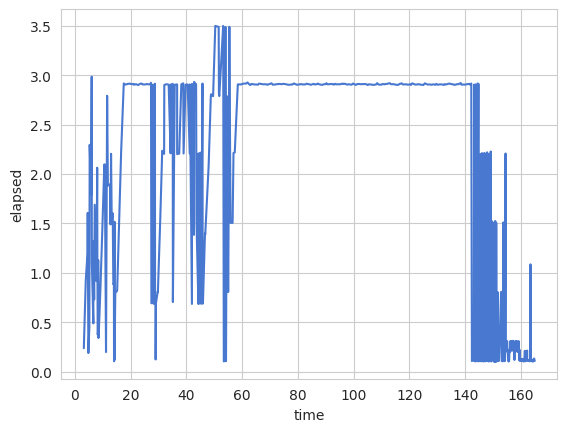

In [37]:
import seaborn as sns

sns.set_palette("muted")

sns.lineplot(data=transformed, x="time", y="elapsed")

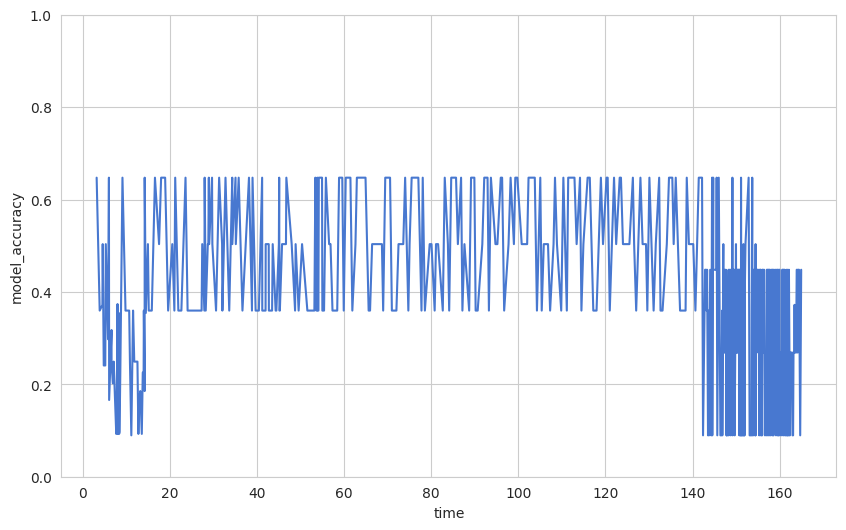

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=transformed, x="time", y="model_accuracy", ax=ax)
ax.set_ylim(0, 1)
plt.show()

<AxesSubplot:xlabel='elapsed', ylabel='Proportion'>

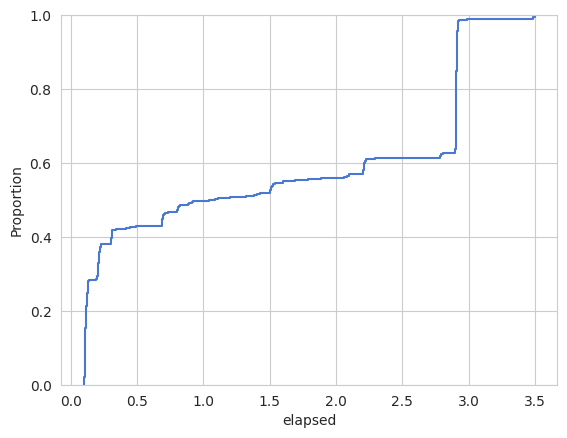

In [39]:
sns.ecdfplot(data=transformed, x="elapsed")

<AxesSubplot:xlabel='model_accuracy', ylabel='Proportion'>

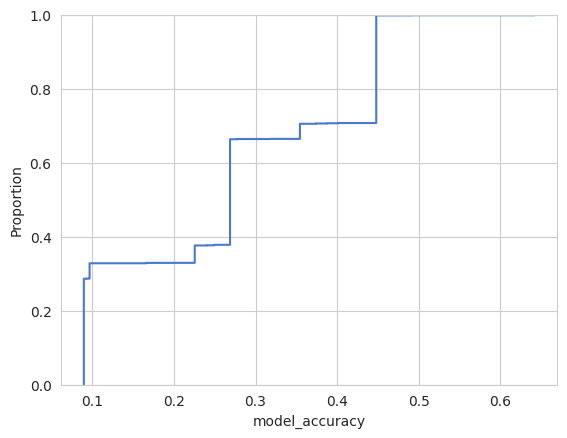

In [120]:
sns.ecdfplot(data=transformed, x="model_accuracy")


/tmp/ipykernel_79133/2588741015.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu["time"] = (cpu.index - min(cpu.index)).total_seconds()


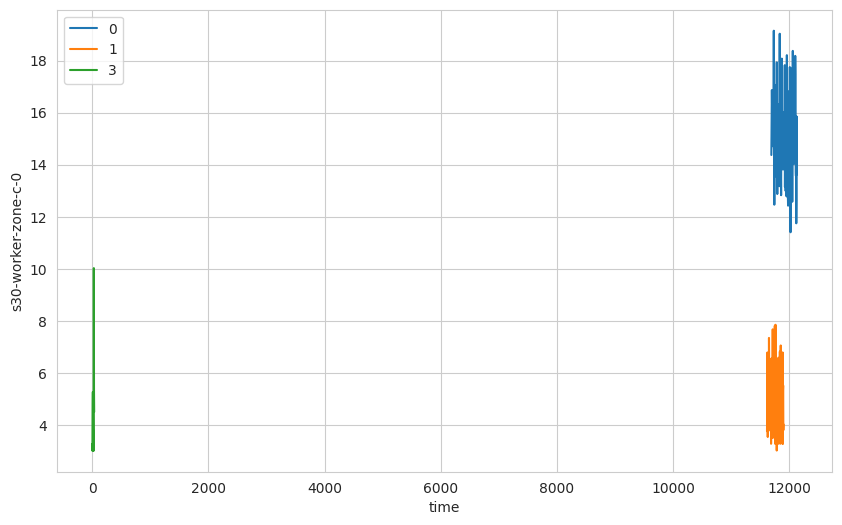

In [60]:
# tm = tm[tm["metric"] == "kubernetes_cgrp_cpu"]
# tm = tm[tm["node"] == "s30-worker-zone-c-0"]
# 
# tm.value.unique()

import matplotlib.pyplot as plt
import seaborn as sns

cpu = tm[tm["metric"] == "cpu"]
cpu["time"] = (cpu.index - min(cpu.index)).total_seconds()
cpu = cpu.drop_duplicates(subset=["time"])

pv = cpu.pivot(index="time", columns="node", values="value")

pv.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-0", label="0")
sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-1", label="1")
# sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-2", label="2")
sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-3", label="3")
plt.legend()
plt.show()


In [15]:
tm

NameError: name 'tm' is not defined